In [32]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

<h2>Percepton OR problem</h2>

In [ ]:
d_in = (2, )
model =  tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=d_in))
model.add(tf.keras.layers.Activation('sigmoid'))
model.compile(loss=tf.keras.losses.MeanSquaredError(),
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.1))

In [15]:
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
Y = [0, 1, 1, 1]
history = model.fit(X, Y, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0768
Epoch 2/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0767
Epoch 3/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0766
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0765
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0764
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0763
Epoch 7/500
1/1 [==============================] - 0s 11ms/step - loss: 0.0762
Epoch 8/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0760
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0759
Epoch 10/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0758
Epoch 11/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0757
Epoch 12/500
1/1 [==============================] - 0s 11ms/step - loss: 0.0756
Epoch 13/500
1/1 [==============================] - 0s 5ms

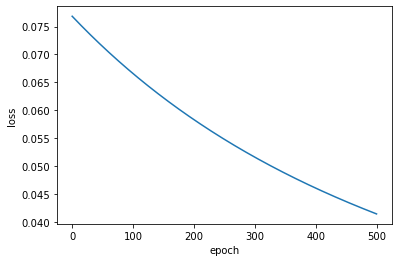

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [20]:
Z = model.predict(X)
print(tf.round(Z))

tf.Tensor(
[[0.]
 [1.]
 [1.]
 [1.]], shape=(4, 1), dtype=float32)


<h2>Multilayers Percepton XOR problem</h2>

In [25]:
d_in = (2, )
model =  tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20, input_shape=d_in))
model.add(tf.keras.layers.Activation('sigmoid'))
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation('sigmoid'))
model.compile(loss=tf.keras.losses.MeanSquaredError(),
             optimizer=tf.keras.optimizers.SGD(learning_rate=1.5))

In [27]:
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
Y = [0, 1, 1, 0]
history_xor = model.fit(X, Y, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0550
Epoch 2/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0546
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0542
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0539
Epoch 5/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0535
Epoch 6/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0531
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0527
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0523
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0520
Epoch 10/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0516
Epoch 11/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0512
Epoch 12/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0509
Epoch 13/500
1/1 [==============================] - 0s 10ms

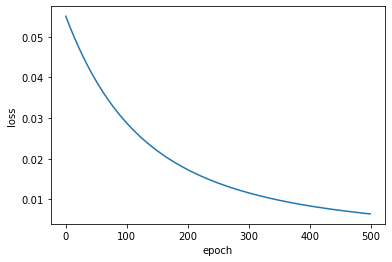

In [29]:
plt.plot(history_xor.history['loss'])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

<h1>linear Regession with gradient Tapes</h1>

In [35]:
#Create data set
N = 100
X = np.random.rand(N)
Y = 5 * X + 10 + 0.4 * np.random.rand(N)

In [38]:
w = np.random.rand()
b = np.random.rand()

w = tf.Variable(w)
b = tf.Variable(b)
lr = 0.1

for epoch in range(1000):
    with tf.GradientTape() as t:
        y = w * X + b
        loss = tf.reduce_mean(((y-Y)**2))
    dw, db = t.gradient(loss, (w, b))
    w.assign_sub(lr * dw)
    b.assign_sub(lr * db)
    print(epoch, w.numpy(), b.numpy(), loss.numpy())
                              

0 2.040667 2.8371048 144.72278
1 3.0115106 4.615918 79.839874
2 3.730079 5.938225 44.05753
3 4.2613325 6.9215045 24.323658
4 4.653512 7.653 13.440254
5 4.942441 8.1975 7.437746
6 5.154723 8.603118 4.1269755
7 5.310114 8.905584 2.3006673
8 5.4232836 9.131433 1.2930228
9 5.505127 9.300367 0.7368707
10 5.5637336 9.427022 0.42971963
11 5.605111 9.5222645 0.25989956
12 5.6337204 9.594165 0.16582489
13 5.652874 9.648716 0.11353317
14 5.6650314 9.69037 0.084294245
15 5.672019 9.72243 0.067778096
16 5.6751924 9.747354 0.058288228
17 5.675558 9.766963 0.05268245
18 5.6738634 9.782613 0.04922777
19 5.6706634 9.795309 0.04696825
20 5.6663685 9.805798 0.045376528
21 5.661285 9.814634 0.044161662
22 5.6556387 9.822231 0.04316288
23 5.6495976 9.828895 0.042291254
24 5.6432867 9.834852 0.041497633
25 5.6367974 9.840273 0.040754784
26 5.630198 9.8452835 0.04004741
27 5.623539 9.849977 0.039366808
28 5.616857 9.854422 0.03870821
29 5.61018 9.858671 0.038068604
30 5.603527 9.862763 0.037446316
31 5.5969

In [ ]:
z = w * X + b
plt.plot(X, Y, ".")
plt.plot(X, Z, ".r")
    plt.savefig('re.png')
         
         